In [1]:
!pip install imblearn

In [2]:
import numpy as np
import imblearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [3]:
data=pd.read_csv('E:\data trained projects\winequality-red.csv')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

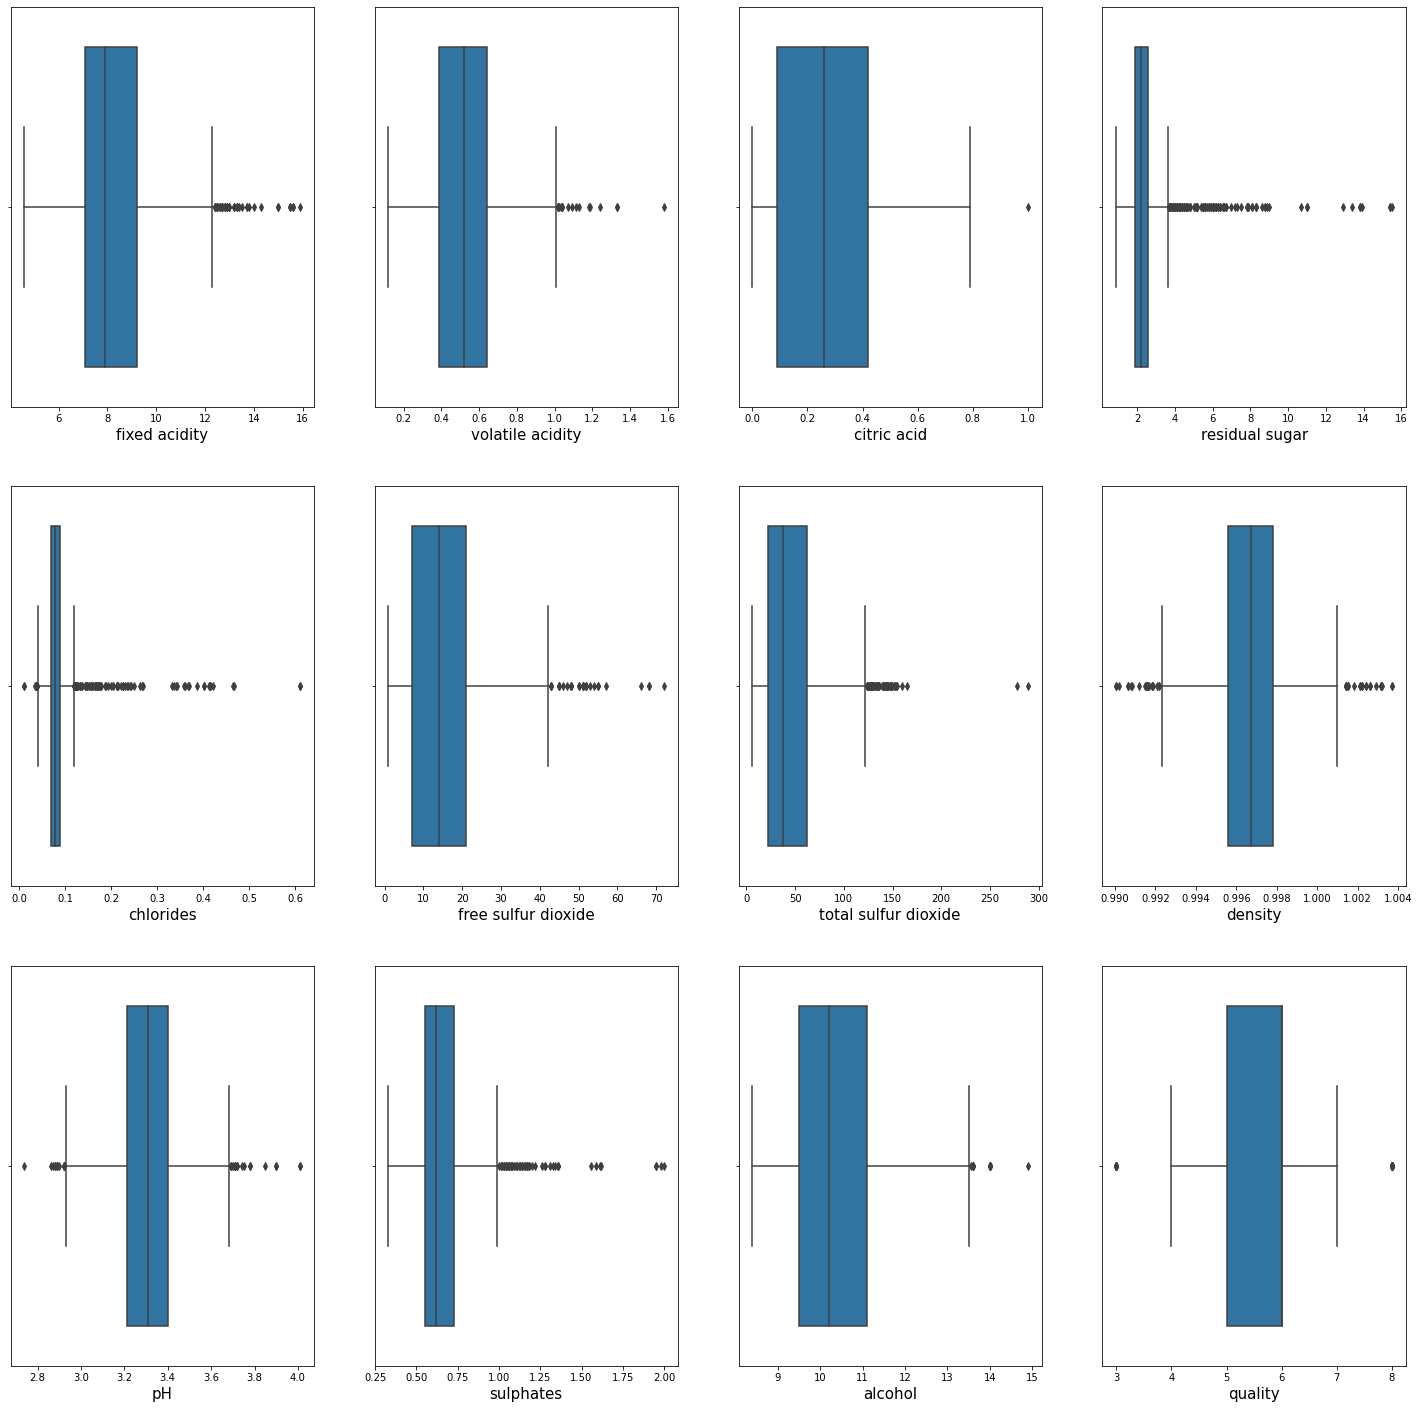

In [8]:
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=12:
        ax=plt.subplot(3,4,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [52]:
data.shape

(1458, 12)

In [9]:
from scipy.stats import zscore
z_score=zscore(data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score < 3).all(axis=1)

data=data[filtering_entry]
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798,5.646776
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649,0.801119
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000,6.000000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


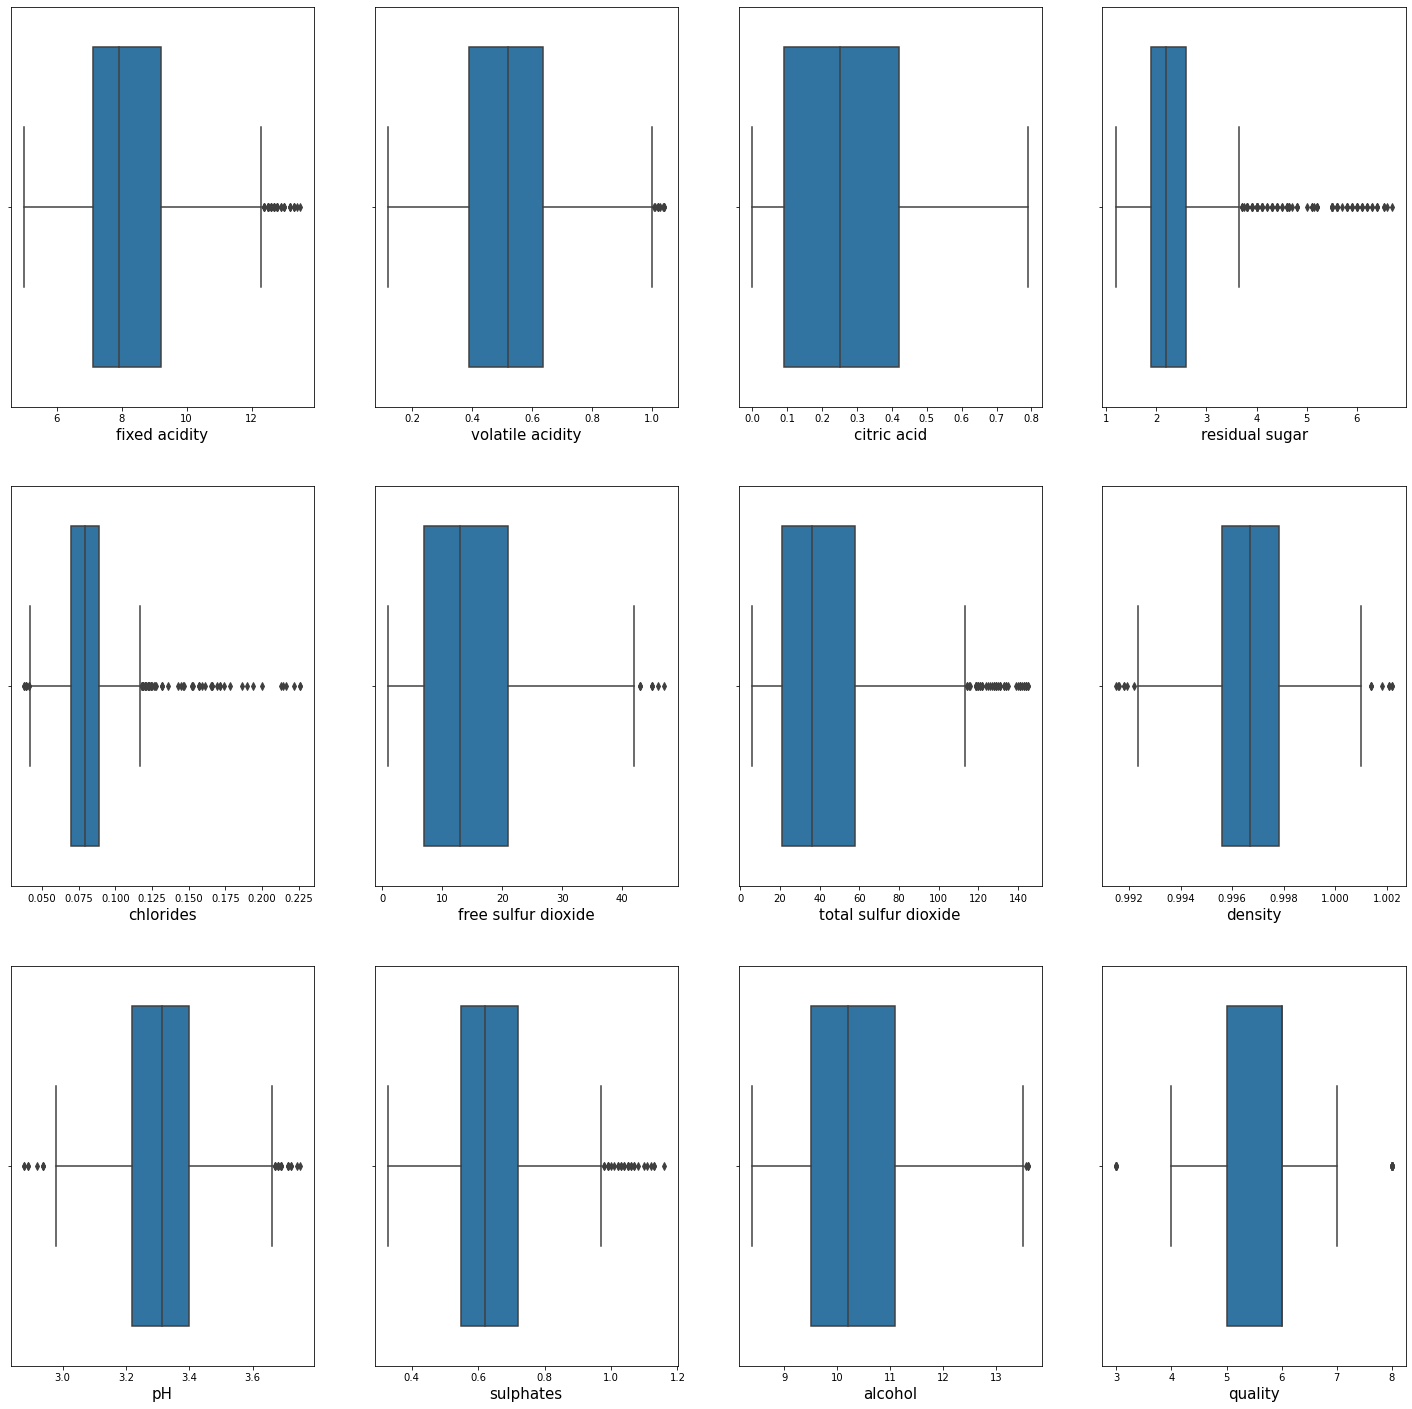

In [10]:
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=12:
        ax=plt.subplot(3,4,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

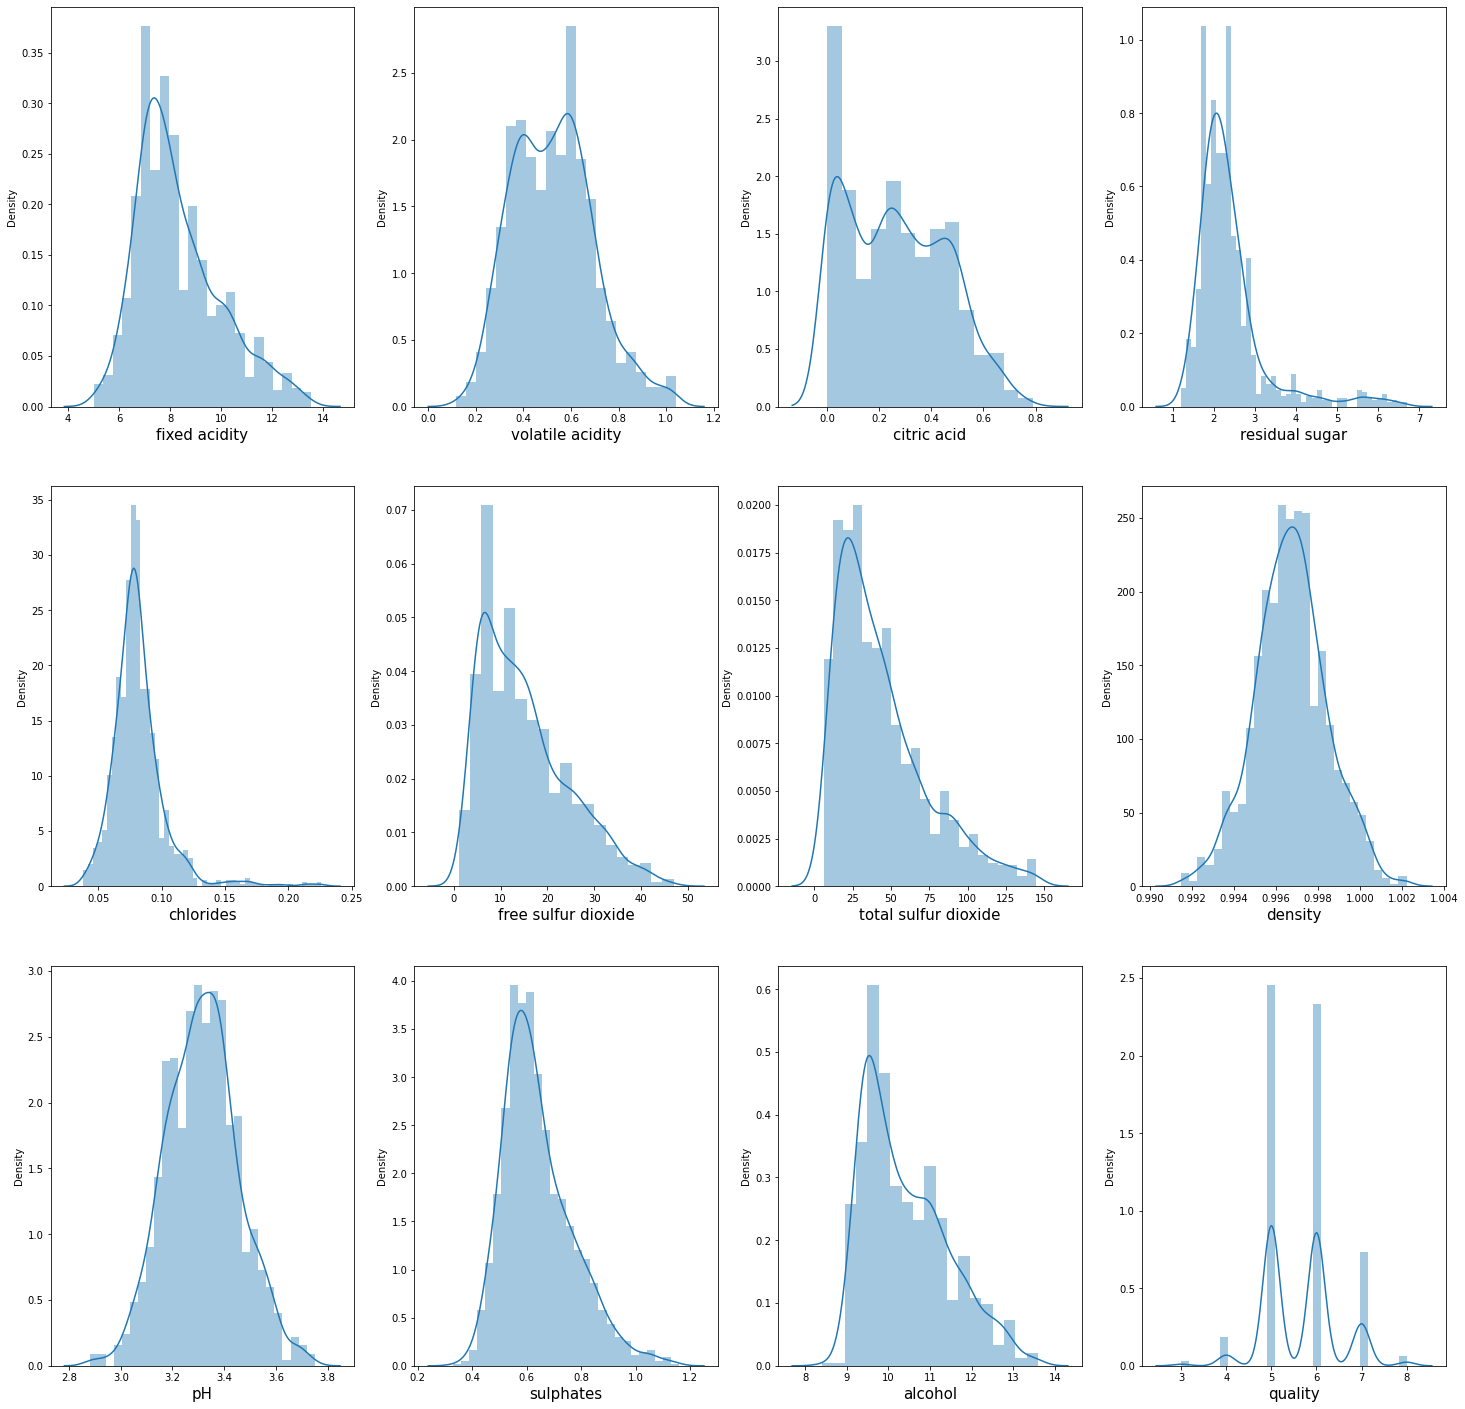

In [11]:
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=12:
        ax=plt.subplot(3,4,graph)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [12]:
data['residual sugar']=np.log(data['residual sugar'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

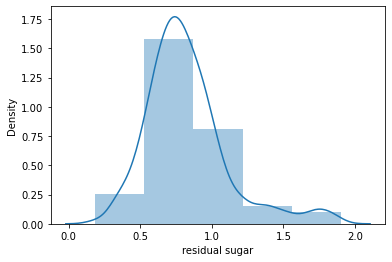

In [13]:
sns.distplot(data['residual sugar'],bins=5)

In [14]:
data['chlorides']=np.log10(data['chlorides'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

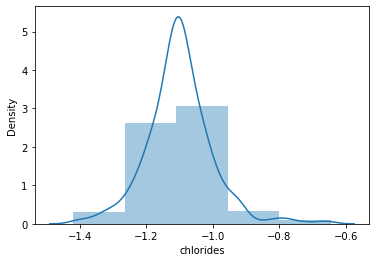

In [15]:
sns.distplot(data['chlorides'],bins=5)

<AxesSubplot:xlabel='quality', ylabel='count'>

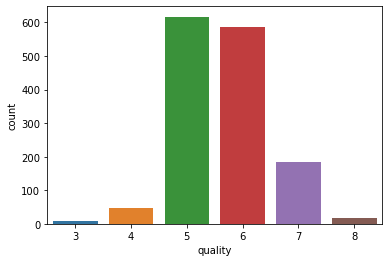

In [16]:
sns.countplot(data['quality'])

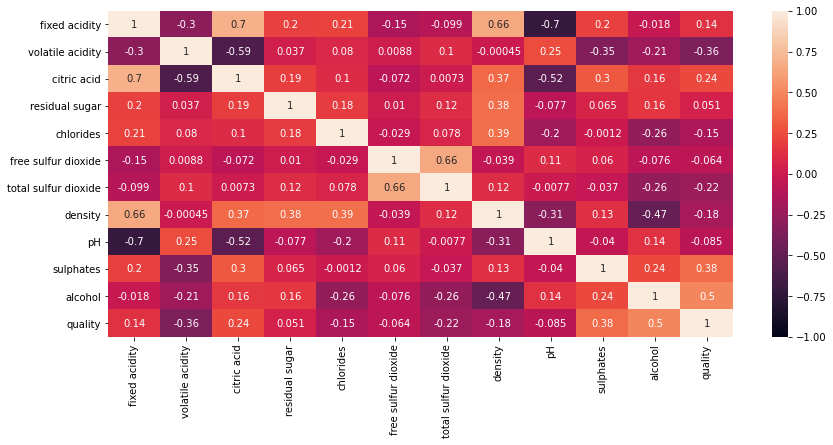

In [17]:

plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [18]:
x=data.drop(labels=['quality'],axis=1)
y=data['quality']

In [19]:
y.value_counts()

5    617
6    586
7    185
4     47
8     16
3      7
Name: quality, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE(k_neighbors=4)
x,y=oversample.fit_resample(x,y)

In [21]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=55)

In [22]:
knn=KNeighborsClassifier()

In [23]:
dt=DecisionTreeClassifier()

In [24]:
rf=RandomForestClassifier()

In [25]:
svc=SVC()

In [26]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
svc.fit(x_train,y_train)

SVC()

In [30]:
knn_pred=knn.predict(x_test)

In [31]:
dt_pred=dt.predict(x_test)

In [32]:
rf_pred=rf.predict(x_test)

In [33]:
svc_pred=svc.predict(x_test)

In [34]:
accuracy_knn=accuracy_score(y_test,knn_pred)*100
accuracy_knn

67.32673267326733

In [35]:
accuracy_dt=accuracy_score(y_test,dt_pred)*100
accuracy_dt

78.66786678667866

In [36]:
accuracy_rf=accuracy_score(y_test,rf_pred)*100
accuracy_rf

85.5085508550855

In [37]:
accuracy_svc=accuracy_score(y_test,svc_pred)*100
accuracy_svc

38.25382538253825

In [38]:
score=cross_val_score(knn,x,y,cv=5)
print('knn cv score:',np.mean(score)*100)

knn cv score: 68.17941423204581


In [39]:
score=cross_val_score(rf,x,y,cv=5)
print('rf cv score:',np.mean(score)*100)

rf cv score: 80.63260021154758


In [40]:
score=cross_val_score(dt,x,y,cv=5)
print('dt cv score:',np.mean(score)*100)

dt cv score: 73.60954882007513


In [41]:
score=cross_val_score(svc,x,y,cv=5)
print('svc cv score:',np.mean(score)*100)

svc cv score: 39.76087828719408


In [42]:
rf=RandomForestClassifier()

params={'n_estimators':[13,15],
        'criterion':['entropy'],
        'max_depth':[10,15],
        'min_samples_split':[10,11],
        'min_samples_leaf':[5,6]}
grd=GridSearchCV(rf,param_grid=params,cv=5,n_jobs=-1)
grd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [10, 15],
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [13, 15]})

In [43]:
best_parameters=grd.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}


In [44]:
grd.best_score_

0.8112683286093689